In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

/home/nikital/.conda/envs/nl97/lib/python3.8/site-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


Quantum jumps. Superradiant Burst

$$ \frac{d \rho}{d t} = -i(H_{\rm eff}\rho - \rho H_{\rm eff}^\dagger) + \gamma S^- \rho S^+$$

Non-Hermitian Hamiltonian: $H_{\rm eff} =- i\frac{\gamma}{2} S^+ S^-$

Jump operator $\sqrt{\gamma} \hat{S}_-$

Total run time:   0.04s
Total run time:   0.03s
Total run time:   0.04s
10.0%. Run time:   0.36s. Est. time left: 00:00:00:03
20.0%. Run time:   0.71s. Est. time left: 00:00:00:02
30.0%. Run time:   1.06s. Est. time left: 00:00:00:02
40.0%. Run time:   1.41s. Est. time left: 00:00:00:02
50.0%. Run time:   1.77s. Est. time left: 00:00:00:01
60.0%. Run time:   2.12s. Est. time left: 00:00:00:01
70.0%. Run time:   2.47s. Est. time left: 00:00:00:01
80.0%. Run time:   2.83s. Est. time left: 00:00:00:00
90.0%. Run time:   3.18s. Est. time left: 00:00:00:00
Total run time:   3.53s


Text(0.5, 0, '$t$')

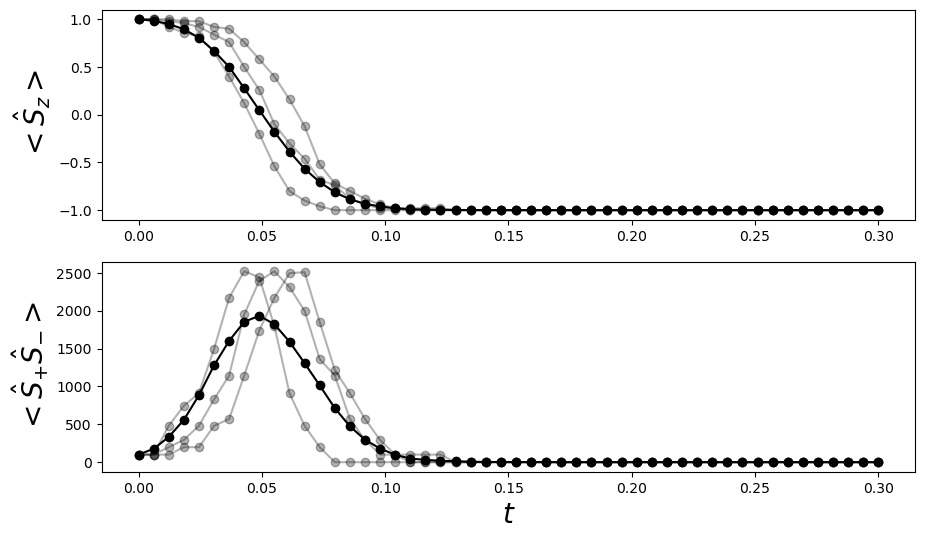

In [3]:
N = 100


jmax = N/2
Jz = jmat(jmax,'z')
Jm = jmat(jmax,'-')
Jp = jmat(jmax,'+')
Jx = jmat(jmax,'x')


ham = 0*Jx


psi0 = basis(int(2*jmax+1),0)

#Units of time 1/\gamma
t1 = np.linspace(0,0.3,50)
mc_lt_3 = mcsolve(ham, psi0, t1, c_ops = [Jm], e_ops = [Jz,Jp*Jm], ntraj = 1,options=Options(num_cpus=1))
fig, axs = plt.subplots(2,1,figsize=(10.5, 6))
axs[0].plot(t1,mc_lt_3.expect[0]/jmax,'k-o',alpha = 0.3)
axs[1].plot(t1,mc_lt_3.expect[1],'k-o',alpha = 0.3)

mc_lt_3 = mcsolve(ham, psi0, t1, [Jm], [Jz,Jp*Jm],ntraj = 1, options=Options(num_cpus=1))
axs[0].plot(t1,mc_lt_3.expect[0]/jmax,'k-o',alpha = 0.3)
axs[1].plot(t1,mc_lt_3.expect[1],'k-o',alpha = 0.3)

mc_lt_3 = mcsolve(ham, psi0, t1, [Jm], [Jz,Jp*Jm],ntraj = 1, options=Options(num_cpus=1))
axs[0].plot(t1,mc_lt_3.expect[0]/jmax,'k-o',alpha = 0.3)
axs[1].plot(t1,mc_lt_3.expect[1],'k-o',alpha = 0.3)
mc_lt_3 = mcsolve(ham, psi0, t1, [Jm], [Jz,Jp*Jm],ntraj = 100,options=Options(num_cpus=1))
axs[0].plot(t1,mc_lt_3.expect[0]/jmax,'k-o')
axs[0].set_ylabel('$<\\hat{S}_z>$',fontsize = '20')
axs[1].plot(t1,mc_lt_3.expect[1],'k-o')
axs[1].set_ylabel('$<\\hat{S}_{+} \\hat{S}_{-}>$',fontsize = '20')
axs[1].set_xlabel('$t$',fontsize = '20')
#Something to characterize Entanglment

Quantum jumps example. Driven-Dicke problem 
$$ \frac{d \rho}{d t} = -i(H_{\rm eff}\rho - \rho H_{\rm eff}^\dagger) + \gamma S^- \rho S^+$$

Non-Hermitian Hamiltonian: $H_{\rm eff} = \Omega S^x + \Delta S^+ S^- - i\frac{\gamma}{2} S^+ S^-$

Jump operator $\sqrt{\gamma} \hat{S}_-$

In [4]:
N = 100
gamma = 1
Delta = 0.5
omc = N/2*np.sqrt(gamma**2/4+Delta**2)
om = 0.5*omc
jmax = N/2
Jz = jmat(jmax,'z')
Jm = jmat(jmax,'-')
Jp = jmat(jmax,'+')
Jx = jmat(jmax,'x')
ham = 2*om*Jx + Delta * Jp* Jm
psi0 = basis(int(2*jmax+1),int(2*jmax))
t1 = np.linspace(0,1,400)
mc_lt_3b = mcsolve(ham, psi0, t1, [Jm], [Jz,Jp*Jm],ntraj = 1,options=Options(num_cpus=1))

Total run time:   0.30s


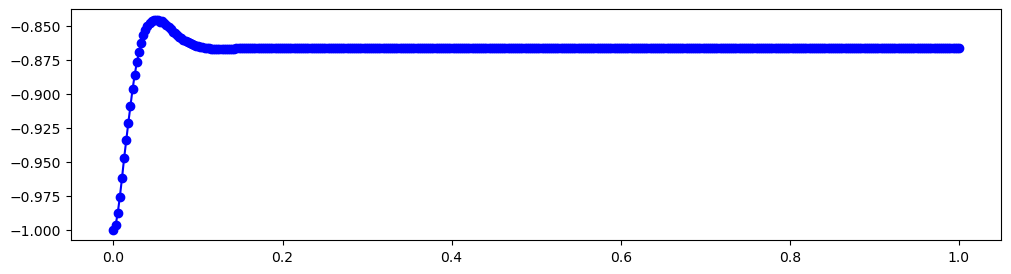

In [5]:
plt.figure(figsize=(12,3))
plt.plot(t1,mc_lt_3b.expect[0]/jmax,'b-o')

In [6]:
N = 100
gamma = 1
Delta = 0.5
omc = N/2*np.sqrt(gamma**2/4+Delta**2)
om = 1.2*omc
jmax = N/2
Jz = jmat(jmax,'z')
Jm = jmat(jmax,'-')
Jp = jmat(jmax,'+')
Jx = jmat(jmax,'x')
ham = 2*om*Jx+Delta * Jp* Jm
psi0 = basis(int(2*jmax+1),int(2*jmax))
t1 = np.linspace(0,1,400)
mc_lt_1a = mcsolve(ham, psi0, t1, [Jm], [Jz,Jp*Jm],ntraj = 1,options=Options(num_cpus=1))

mc_lt_1b = mcsolve(ham, psi0, t1, [Jm], [Jz,Jp*Jm],ntraj = 1,options=Options(num_cpus=1))

mc_lt_1c = mcsolve(ham, psi0, t1, [Jm], [Jz,Jp*Jm],ntraj = 1,options=Options(num_cpus=1))

mc_lt_100a = mcsolve(ham, psi0, t1, [Jm], [Jz,Jp*Jm],ntraj = 100,options=Options(num_cpus=10))

Total run time:   0.88s
Total run time:   0.99s
Total run time:   0.95s
10.0%. Run time:   1.64s. Est. time left: 00:00:00:14
20.0%. Run time:   2.93s. Est. time left: 00:00:00:11
30.0%. Run time:   4.22s. Est. time left: 00:00:00:09
40.0%. Run time:   5.52s. Est. time left: 00:00:00:08
50.0%. Run time:   6.79s. Est. time left: 00:00:00:06
60.0%. Run time:   8.06s. Est. time left: 00:00:00:05
70.0%. Run time:   9.42s. Est. time left: 00:00:00:04
80.0%. Run time:  10.54s. Est. time left: 00:00:00:02
90.0%. Run time:  11.60s. Est. time left: 00:00:00:01
100.0%. Run time:  12.54s. Est. time left: 00:00:00:00
Total run time:  12.55s


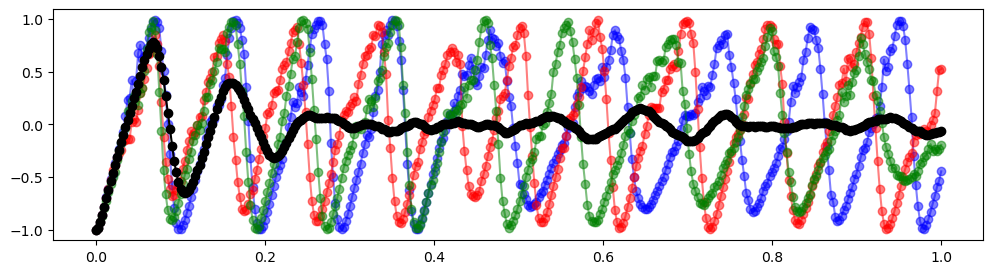

In [7]:
plt.figure(figsize=(12,3))
plt.plot(t1,mc_lt_1a.expect[0]/jmax,'b-o', alpha = 0.5)
plt.plot(t1,mc_lt_1b.expect[0]/jmax,'r-o', alpha = 0.5)
plt.plot(t1,mc_lt_1c.expect[0]/jmax,'g-o', alpha = 0.5)
plt.plot(t1,mc_lt_100a.expect[0]/jmax,'k-o')

In [8]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.3
Numpy Version:      1.24.3
Scipy Version:      1.10.1
Cython Version:     3.0.6
Matplotlib Version: 3.7.2
Python Version:     3.8.18
Number of CPUs:     48
BLAS Info:          INTEL MKL
OPENMP Installed:   False
INTEL MKL Ext:      True
Platform Info:      Linux (x86_64)
Installation path:  /home/nikital/.conda/envs/nl97/lib/python3.8/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily 